In [120]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

In [121]:
def plot_errors(arguments, values):
    plt.plot(arguments, values, linestyle='-', color='blue')
    plt.grid(True)
    plt.yscale('log')
    plt.xscale('log')
    plt.show()

In [122]:
def midpoint_rule(start, end, function, number_of_rectangles):
    dx = (end-start) / number_of_rectangles
    result = 0
    midpoint = (start + dx)/2
    for x in range(number_of_rectangles):
        result += function(midpoint)
        midpoint += dx
    return result*dx

In [123]:
midpoint_rule(0, math.pi, lambda x: math.sin(x), 900)

2.000001015391796

In [124]:
def midpoint_rule_accuracy(start, end,function, number_of_intervals, ):
    arguments = []
    values = []
    for x in range(1,number_of_intervals+1):
        arguments.append(x)
        values.append(midpoint_rule(start, end, function, x)-2)
    return arguments, values

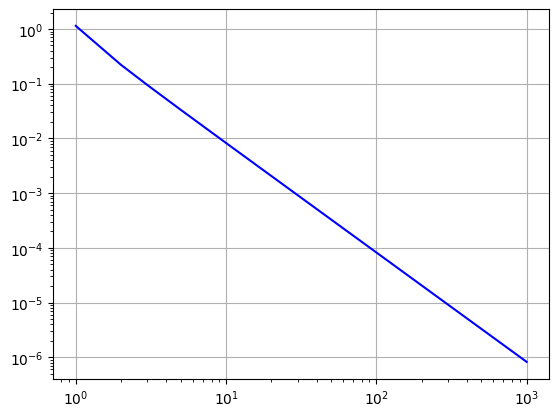

In [125]:
arguments, values = midpoint_rule_accuracy(0, math.pi, lambda x: math.sin(x), 1000)
plot_errors(arguments, values)

In [126]:
def trapezoid(start, end, function, number_of_trapezoids):
    dx = (end - start) / number_of_trapezoids
    x_i = 0
    result = 0
    for x in range(number_of_trapezoids):
        x_i_next = x_i + dx
        result += (function(x_i) + function(x_i_next))/2 * dx
        x_i = x_i_next
    return result

In [127]:
def trapezoid_accuracy(start, end, function, number_of_intervals):
    arguments = []
    values = []
    for x in range(1,number_of_intervals+1):
        arguments.append(x)
        values.append(2-trapezoid(start, end, function, x))
    return arguments, values

In [128]:
trapezoid(0, math.pi, lambda x: math.sin(x), 1000)

1.9999983550656886

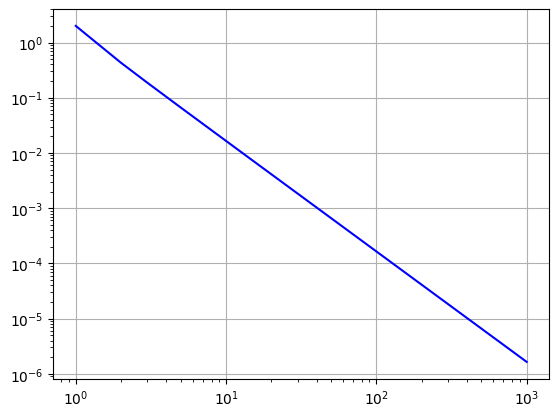

In [129]:
arguments, values = trapezoid_accuracy(0, math.pi, lambda x: math.sin(x), 1000)
plot_errors(arguments, values)

In [130]:
def monte_carlo(start, end, function,number_of_random_numbers):
    arguments = []
    sum = 0
    for x in range(number_of_random_numbers):
        arguments.append(random.uniform(start, end))
    for y in range(number_of_random_numbers):
        sum += function(arguments[y])
    mean = sum/number_of_random_numbers
    variance_sum = 0
    for z in range(number_of_random_numbers):
        variance_sum += (function(arguments[z]) - mean) ** 2
    variance = variance_sum / (number_of_random_numbers - 1)
    std = np.sqrt(variance/number_of_random_numbers)
    return mean*end, std


In [131]:
result, std = monte_carlo(0, math.pi, lambda x: math.sin(x),1000)
print("Area:", result)
print("Std:", std)

Area: 2.022188876947359
Std: 0.009790355328953353


In [132]:
def sin_squared(x):
    return math.sin(x)**2

def mean_value(arguments, function):
    sum = 0
    for x in arguments:
        sum += function(x)
    return sum/len(arguments)

def vegas(N, a, b, f, bins, iterations):
    dx = (b-a)/bins
    weights = [1.0/bins for i in range(bins)]
    area = 0
    for i in range (iterations):
        mean_values = [0 for i in range(bins)]
        for x in range(bins):
            num_bins = N*weights[x]
            if num_bins >1 :
                num_bins = int(num_bins)
            else:
                num_bins = 1
            b = a + dx
            mean_values[x] = mean_value([random.uniform(a, b) for _ in range(num_bins)], f)
            a = b
            area += dx*mean_values[x]
        weights = mean_values / np.sum(mean_values)
    return area/iterations

In [133]:
print(vegas(1000, 0, 2*math.pi, sin_squared, 10, 20))

3.1491342775808597


In [134]:
def monte_carlo_N_dimensions(start, end, function, number_of_dimensions, number_of_random_numbers):
    result_of_each_dimension = []
    result = 1
    for x in range(number_of_dimensions):
        res, std = monte_carlo(start,end,function,number_of_random_numbers)
        result_of_each_dimension.append(res)
    for x in result_of_each_dimension:
        result *= x
    return result


In [135]:
print(monte_carlo_N_dimensions(0, math.pi, lambda x: math.sin(x), 4, 100000))

15.989296136269912
